# Aula 2: Tratamiento de datos y primeros gráficos
Inmersión de datos con Python 2023, Alura

## Environment config

In [60]:
import pandas as pd

inmuebles = pd.read_csv('./datasheet/inmuebles_bogota.csv')

### Set number display format

In [61]:
# enteros con 2 decimales
pd.set_option('display.precision',2)

# flotantes con 2 decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data treatment
### Rename columns

In [62]:
new_names = {'Baños' : 'Banios', 'Área' : 'Area'}
inmuebles = inmuebles.rename(columns=new_names)

### Turn string to float64

In [63]:
# Get array ['$','3.200']
prices = inmuebles.Valor.str.split(expand=True)

ptype = prices[0]
pvalue = prices[1]

# remove . from numbers (3.200 => 3200)
pvalue = pvalue.str.replace('.','')
# change data type from string (object) to flat64
pvalue = pvalue.astype('float')
# prices will be displayed in millions of pesos
pvalue = pvalue/1000000

# Save values in inmuebles dataframe 
inmuebles['Moneda'] = ptype
inmuebles['Precio'] = pvalue

## Graphics

In [64]:
inmuebles['Precio'].describe()

count    9520.00
mean      602.06
std       704.60
min        60.00
25%       250.00
50%       409.18
75%       680.00
max     16000.00
Name: Precio, dtype: float64

#### Pandas histogram

<Axes: ylabel='Frequency'>

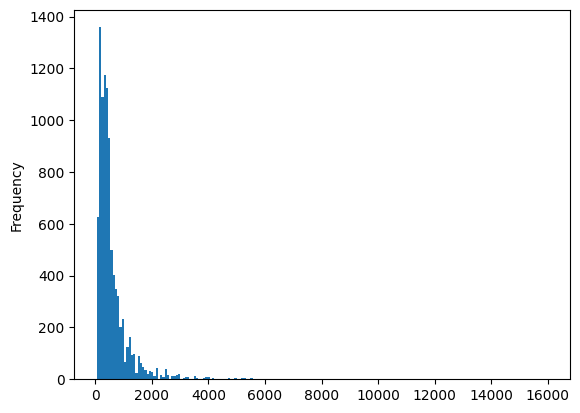

In [65]:
inmuebles['Precio'].plot.hist(bins=200)

### Matplot lib


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

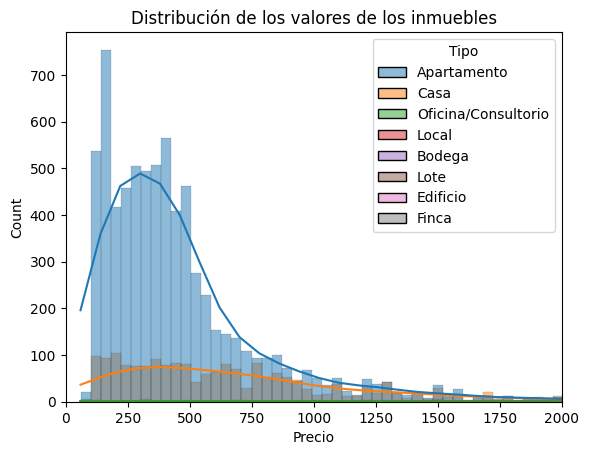

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib 'figure', a kind of frame for our pictures
# witdh=10, height=8
plt.figure()
hist = sns.histplot(data=inmuebles, x='Precio',kde=True, hue='Tipo')
hist.set_title('Distribución de los valores de los inmuebles')
plt.xlim((0,2000))
plt.savefig('./output_images/values_distribution.png',format='png')
plt.show()


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

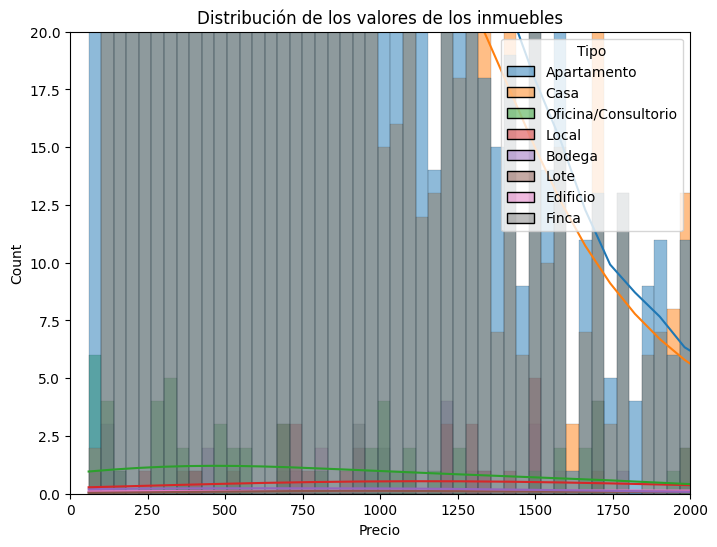

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib figure, witdh=10, height=8
plt.figure(figsize=(8,6))
hist = sns.histplot(data=inmuebles, x='Precio',kde=True, hue='Tipo')
hist.set_title('Distribución de los valores de los inmuebles')
plt.xlim((0,2000))
plt.ylim((0,20))
plt.savefig('./output_images/type_price_distr.png',format='png')
plt.show()

## Desafíos
1. Mostrar solo 3 tipos de inmuebles en el histograma
2. Aumentar el tamaño de los labels y añadir labels
3. Obtener precio del metro cuadrado por barrio y graficar de la forma más apropiada
4. Conclusiones e insights del análisis

### 1. Mostrar los 3 tipos de inmuebles más comunes

In [68]:
types_filter = ((inmuebles.Tipo == 'Apartamento') | (inmuebles.Tipo == 'Casa') | (inmuebles.Tipo == 'Oficina/Consultorio') )
types_table = inmuebles[types_filter]
types_table.groupby('Tipo').agg(
    count=pd.NamedAgg(column='Tipo',aggfunc='count')
)

,count
Tipo,
Apartamento,7327
Casa,2043
Oficina/Consultorio,60


In [17]:
types_table[['Tipo','Precio']].groupby('Tipo').describe()

Precio                                             \
                      count   mean     std   min    25%    50%     75%   
Tipo                                                                     
Apartamento         7327.00 519.14  598.95 79.00 236.50 380.00  559.97   
Casa                2043.00 827.05  781.41 85.00 330.00 620.00  997.00   
Oficina/Consultorio   60.00 956.76 1034.54 60.00 308.75 700.00 1312.50   

                              
                         max  
Tipo                          
Apartamento         13200.00  
Casa                 8800.00  
Oficina/Consultorio  6720.79

#### Graphics

Graphic 1: Distribución o histograma de precios

C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

<Axes: xlabel='Precio', ylabel='Count'>

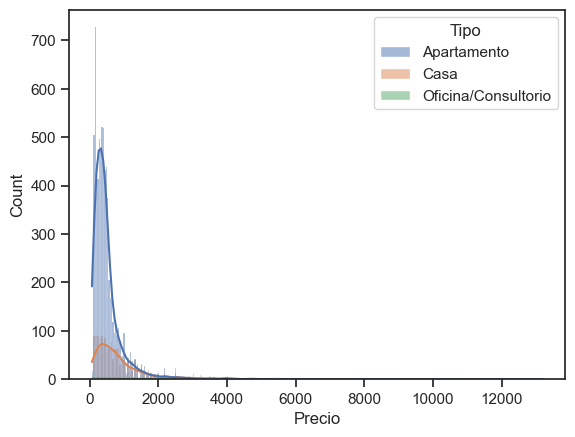

In [129]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style='ticks')

plt.figure()
sns.histplot(
    data=types_table,
    kde=True,
    x='Precio', hue='Tipo'
)


### 3. Obtener precio del metro cuadrado por barrio y graficar de la forma más apropiada

Obtenermos el valor de metro cuadrado por barrio

Este es la sumatoria de los precios de los inmuebles en el barrio sobre la sumatoria de las áreas de los inmuebles

In [81]:
datos_barrios = inmuebles.groupby('Barrio').sum()
datos_barrios['Valor_m2_Barrio'] = datos_barrios['Precio'] / datos_barrios['Area']
datos_barrios[['Area','Precio','Valor_m2_Barrio']]

,Area,Precio,Valor_m2_Barrio
Barrio,,,
Alameda,97,580.00,5.98
Alhambra,3237,12790.00,3.95
Andes Norte,874,4967.00,5.68
Antonio Nariño,7827,22042.65,2.82
Barrancas,1053,4712.00,4.47
...,...,...,...
Villa Maria,2693,5237.00,1.94
Villas De Granada,1905,6210.62,3.26
Villemar,1384,5469.00,3.95


Ahora lo comparamos con el promedio de metro cuadrado de cada inmueble

In [82]:
inmuebles['Valor_m2'] = inmuebles['Precio'] / inmuebles['Area']
inmuebles[['Tipo','Valor_m2']].groupby('Tipo').describe()

Valor_m2                                    
                       count mean  std  min  25%  50%  75%   max
Tipo                                                            
Apartamento          7327.00 5.32 2.33 0.02 3.90 4.95 6.40 90.00
Bodega                 13.00 3.83 1.73 2.06 2.85 3.08 6.19  6.32
Casa                 2043.00 3.85 2.00 0.01 2.62 3.51 4.64 38.00
Edificio               22.00 5.46 3.47 2.17 3.62 4.08 6.09 14.17
Finca                  11.00 4.27 3.78 0.11 0.59 6.25 8.11  8.14
Local                  38.00 6.23 4.96 1.52 3.34 4.41 7.07 20.81
Lote                    6.00 4.43 1.33 2.79 3.26 4.86 5.50  5.65
Oficina/Consultorio    60.00 7.31 2.81 2.50 5.99 7.01 8.95 15.50

Añadimos el precio de metro cuadrado por barrio a tabla de inmuebles

In [85]:
# Add al array inmuebles
m2_barrios = dict(datos_barrios['Valor_m2_Barrio'])

inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrios)
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Valor_m2,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970.00,7.58,6.29


#### Gráficas

Seleccionamos los nombres de los barrios con más inmuebles

In [86]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object', name='Barrio')

In [89]:
datos_barrios.reset_index(inplace=True)
datos_barrios[['Area','Precio','Valor_m2_Barrio']].head()

,Area,Precio,Valor_m2_Barrio
0,97,580.00,5.98
1,3237,12790.00,3.95
2,874,4967.00,5.68
3,7827,22042.65,2.82
4,1053,4712.00,4.47


In [97]:
datos_barrios[['Barrio','Valor_m2_Barrio']].query('Barrio in @topbarrios')

,Barrio,Valor_m2_Barrio
5,Barrios Unidos,2.96
10,Bosa,2.68
22,Cedritos,5.03
24,Chapinero,4.58
50,Engativa,2.89
63,Kennedy,3.38
125,Santa Barbara,5.85
132,Suba,4.32
138,Usaquén,5.66
148,Zona Noroccidental,4.57


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

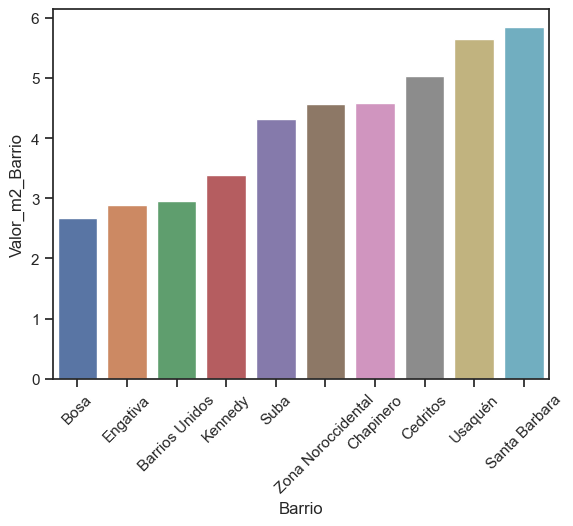

In [131]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

datasheet = datos_barrios.query('Barrio in @top_barrios')
datasheet = datasheet.sort_values(by='Valor_m2_Barrio')

plt.figure()
ax = sns.barplot(
    x='Barrio',
    y='Valor_m2_Barrio',
    data=datasheet
)

# rotate labels
ax.tick_params(axis='x',rotation=45)

plt.show()


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

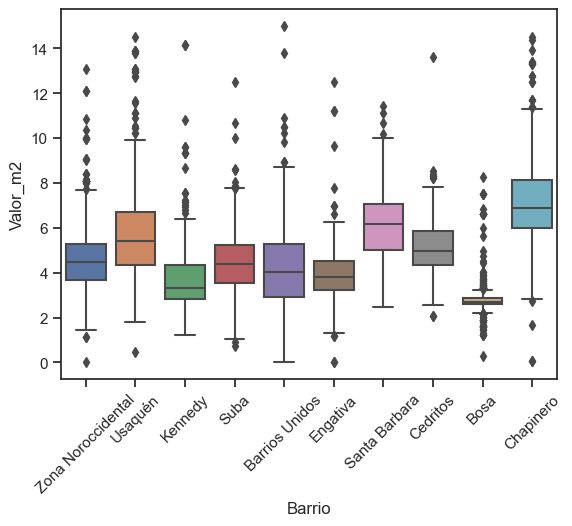

In [132]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

datasheet = inmuebles.query('Barrio in @top_barrios')
# Eliminar datos discrepantes (errores)
datasheet = datasheet.query('Valor_m2 < 15')

plt.figure()
ax = sns.boxplot(
    x='Barrio',
    y='Valor_m2',
    data=datasheet
)

# rotate labels
ax.tick_params(axis='x',rotation=45)

plt.show()

C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

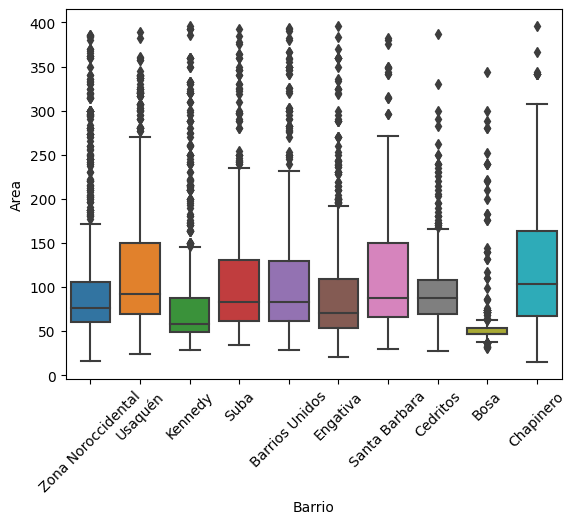

In [119]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

datasheet = inmuebles.query('Barrio in @top_barrios')
datasheet = datasheet.query('Area < 400')

plt.figure()
ax = sns.boxplot(
    x='Barrio',
    y='Area',
    data=datasheet
)

ax.tick_params(axis='x', rotation=45)
plt.show()

